In [ ]:
# Remember to set Runtime > Change runtime type to one with a GPU.

# Setup
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 41.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


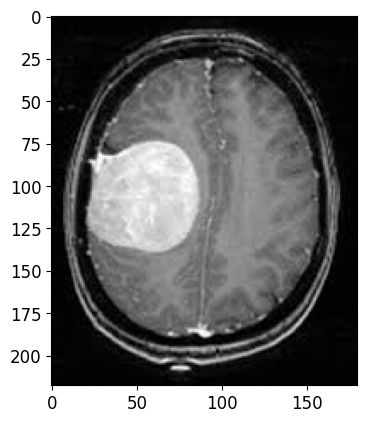

In [ ]:
import os

# What does an image look like?
images_dir_path = '/content/drive/MyDrive/brain_tumor_dataset'
file_path = os.path.join( images_dir_path, "yes" )
file_path = os.path.join( file_path, "Y1.jpg" )
from PIL import Image
image = Image.open( file_path )
from matplotlib import pyplot
pyplot.imshow( image )

In [ ]:
from fastai.vision.all import *

In [ ]:
# Create a DataBlock
block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=parent_label,
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)


# Lets use the data block to create a data loader
loaders = block.dataloaders( images_dir_path )
print( f"loaders:\n{loaders}" )

loaders:


In [ ]:
# Let's create a learner using an existing model -- loss_func is implicitly set
learner = cnn_learner(
    loaders, # where the data comes from
    alexnet, # one of simplest pre-trained models (https://pytorch.org/vision/stable/models.html)
    metrics = error_rate # supplementary validation metrics to display while training
    )

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 174MB/s]


In [ ]:
# Lets train for a single epoch to confirm all things are set up properly
learner.fine_tune( 1 )

epoch,train_loss,valid_loss,error_rate,time
0,1.108114,1.316199,0.380000,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.796427,0.951021,0.340000,00:02


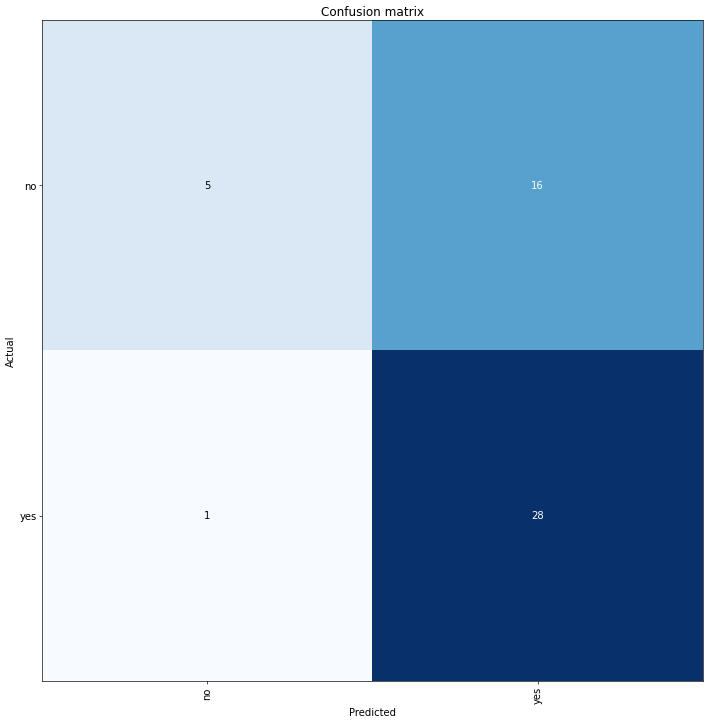

In [ ]:
#  What is our starting state?
#
#  Validation data is used to calculate confusion matrix.
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 12, 12 ), dpi = 60 )

LR suggestion = 2.29e-04


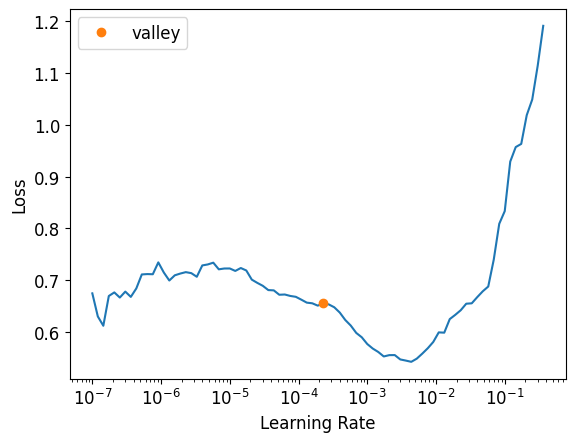

In [ ]:
# What's a good learning rate for this model-problem?
lr_suggestion = learner.lr_find( )
print( f"LR suggestion = {lr_suggestion[ 0 ]:.2e}" )

In [ ]:
# We could tinker in more detail with the layer training, but let's just run
# fine_tune a couple of times with the preferred learning rate and see if that
# gets us to a good spot
for i in range( 10 ):
  print( f"\n\nfine tuning iteration #{i+1}" )
  learner.fine_tune( 1, base_lr = 2.29e-04 )



fine tuning iteration #1


epoch,train_loss,valid_loss,error_rate,time
0,0.682398,0.700526,0.280000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.637636,0.539995,0.280000,00:02




fine tuning iteration #2


epoch,train_loss,valid_loss,error_rate,time
0,0.807097,0.457279,0.260000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.702441,0.404129,0.200000,00:02




fine tuning iteration #3


epoch,train_loss,valid_loss,error_rate,time
0,0.735745,0.368889,0.160000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.632391,0.352910,0.180000,00:02




fine tuning iteration #4


epoch,train_loss,valid_loss,error_rate,time
0,0.584816,0.347576,0.180000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.578769,0.347355,0.160000,00:02




fine tuning iteration #5


epoch,train_loss,valid_loss,error_rate,time
0,0.643388,0.347445,0.160000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.622883,0.342482,0.180000,00:02




fine tuning iteration #6


epoch,train_loss,valid_loss,error_rate,time
0,0.617139,0.342586,0.160000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.681929,0.350119,0.180000,00:02




fine tuning iteration #7


epoch,train_loss,valid_loss,error_rate,time
0,0.632246,0.356419,0.160000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.581517,0.355472,0.160000,00:02




fine tuning iteration #8


epoch,train_loss,valid_loss,error_rate,time
0,0.463701,0.351007,0.180000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.643116,0.337006,0.160000,00:02




fine tuning iteration #9


epoch,train_loss,valid_loss,error_rate,time
0,0.552728,0.338625,0.160000,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.462847,0.335535,0.160000,00:02




fine tuning iteration #10


epoch,train_loss,valid_loss,error_rate,time
0,0.526590,0.328441,0.160000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.494720,0.332033,0.160000,00:03


LR suggestion = 1.91e-04


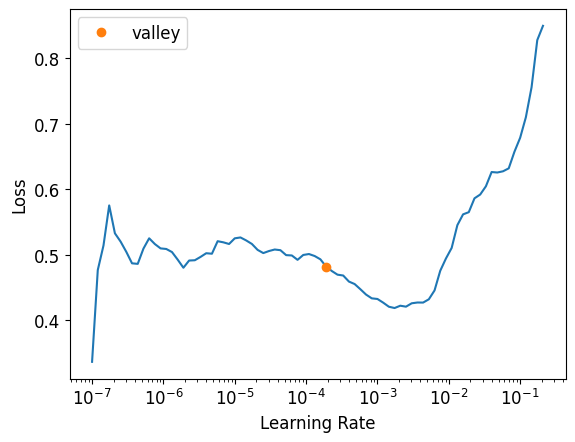

In [ ]:
# Did the recommended learning rate change?
lr_suggestion = learner.lr_find( )
print( f"LR suggestion = {lr_suggestion[ 0 ]:.2e}" )

In [ ]:
# Let's adjust and train a bit more -- we should get to a point
# where we should clearly stop training
for i in range( 5 ):
  print( f"\n\nfine tuning iteration #{i+1}" )
  learner.fine_tune( 1, base_lr = 1.91e-04 )



fine tuning iteration #1


epoch,train_loss,valid_loss,error_rate,time
0,0.490977,0.335968,0.180000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.465706,0.336438,0.180000,00:02




fine tuning iteration #2


epoch,train_loss,valid_loss,error_rate,time
0,0.510597,0.331114,0.180000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.505412,0.333817,0.180000,00:02




fine tuning iteration #3


epoch,train_loss,valid_loss,error_rate,time
0,0.514369,0.337516,0.180000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.530096,0.341323,0.180000,00:02




fine tuning iteration #4


epoch,train_loss,valid_loss,error_rate,time
0,0.585572,0.335333,0.180000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.455395,0.334664,0.180000,00:02




fine tuning iteration #5


epoch,train_loss,valid_loss,error_rate,time
0,0.358078,0.332124,0.160000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.475856,0.334676,0.160000,00:02


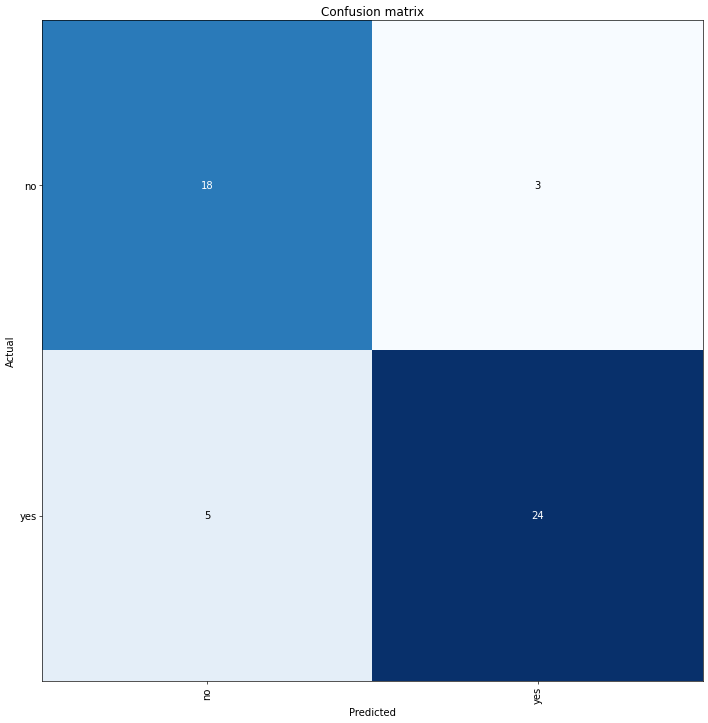

In [ ]:
# What does our confusion matrix look like now?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 12, 12 ), dpi = 60 )


prediction = yes
prediction_index: 1
prediction_scores: tensor([0.0112, 0.9888])




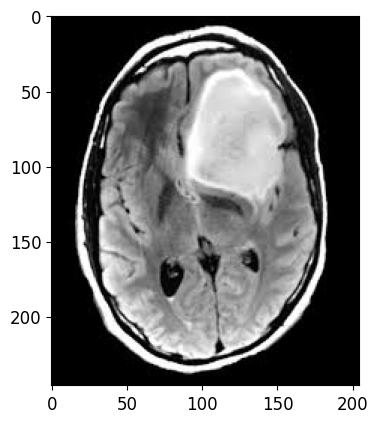

In [ ]:
# Let's make a prediction using one of the original images
file_path = os.path.join( images_dir_path, "yes" )
file_path = os.path.join( file_path, "Y105.jpg" )
image = Image.open( file_path )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_index, prediction_scores = learner.predict( file_path )
print( f"prediction = {prediction}\nprediction_index: {prediction_index}\nprediction_scores: {prediction_scores}\n\n" )

In [ ]:
# Let's also save our model for posterity
learner.export( )
os.listdir( )

['.config', 'gdrive', 'drive', 'models', 'export.pkl', 'sample_data']

prediction = no
prediction_index = 0


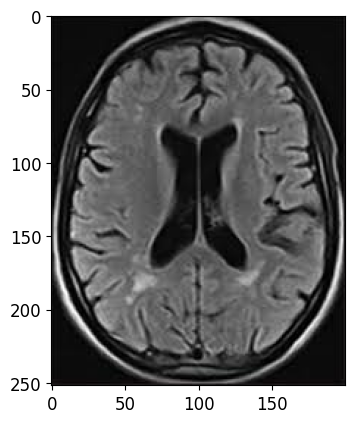

In [ ]:
# And to come full circle, let's clear the learner, load the model and make a
# prediction to demonstrate portability
learner = []
learner = load_learner( "export.pkl" )

# Let's make a prediction using one of the original images
file_path = os.path.join( images_dir_path, "no" )
file_path = os.path.join( file_path, "26 no.jpg" )
from PIL import Image
image = Image.open( file_path )
from matplotlib import pyplot
pyplot.imshow( image )

# Make a prediction
prediction, prediction_index, prediction_scores = learner.predict( file_path )
print( f"prediction = {prediction}\nprediction_index = {prediction_index}" )